<a href="https://colab.research.google.com/github/ananthrn/Coursera-gettings-started-with-tensorflow-2/blob/main/Copy_of_Coding_Tutorial_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model

model = Sequential(
      [ Flatten(input_shape=(28, 28)),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
      ]
)

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 16)                12560     
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model

conv_model = Sequential(
    [
     Conv2D(16, (3, 3), activation='relu', strides = 2, padding = 'SAME', input_shape=(28, 28, 1)),
     MaxPooling2D((3, 3), strides = 2),
     Flatten(),
     Dense(16, activation='relu'),
     Dense(10, activation='softmax')
    ]
)


In [ ]:
# Print the model summary
conv_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 16)                9232      
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 9,562
Trainable params: 9,562
Non-trainable params: 0
______________________________________________________

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
conv_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['sparse_categorical_accuracy']
)


In [ ]:
# Print the resulting model attributes
print("conv model loss:", conv_model.loss)
print("conv model optimizer:", conv_model.optimizer)
print("conv model metrics:", conv_model.metrics)

conv model loss: sparse_categorical_crossentropy
conv model optimizer: <keras.optimizer_v2.adam.Adam object at 0x7fdeed4dffd0>
conv model metrics: []


***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of the training data

print("train data shape:", train_images.shape)
print("test data shape: ", test_images.shape)
print("train labels shape: ", train_labels.shape)
print("Test labels shape: ", test_labels.shape)

train data shape: (60000, 28, 28)
test data shape:  (10000, 28, 28)
train labels shape:  (60000,)
Test labels shape:  (10000,)


In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.0
test_images = test_images/255.0

Ankle boot


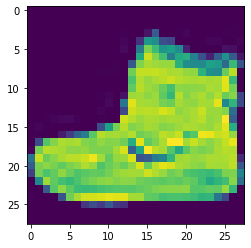

In [ ]:
# Display one of the images
plt.imshow(train_images[0])
print(labels[train_labels[0]])

#### Fit the model

In [ ]:
# Fit the model
history = conv_model.fit(
    x=train_images,
    y=train_labels,
    batch_size=32,
    epochs=10
)


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3423 - sparse_categorical_accuracy: 0.8781
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3293 - sparse_categorical_accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3205 - sparse_categorical_accuracy: 0.8849
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3135 - sparse_categorical_accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3073 - sparse_categorical_accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3015 - sparse_categorical_accuracy: 0.8907
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2970 - sparse_categorical_accuracy: 0.8926
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2937 - sparse_categorical_accuracy: 0.8933
Epoch 9/10
1875/1875 [==

#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
history_df = pd.DataFrame.from_dict(history.history)

In [ ]:
history_df.head()

,loss,sparse_categorical_accuracy
0,0.342289,0.878150
1,0.329335,0.882700
2,0.320501,0.884900
3,0.313537,0.886783
4,0.307274,0.889867


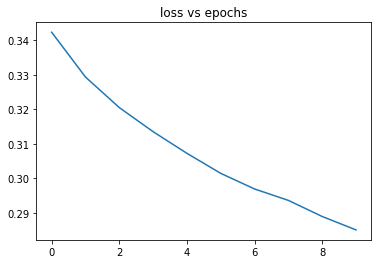

In [ ]:
# Make a plot for the loss
loss_plot = history_df.plot(y='loss', title='loss vs epochs', legend=False)
loss_plot.set(xlabel='epochs', ylabel='loss')

[Text(0, 0.5, 'sparse_categorical_accuracy'), Text(0.5, 0, 'epochs')]

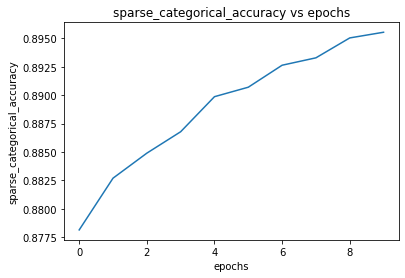

In [ ]:
# Make a plot for the accuracy
accuracy_plot = history_df.plot(y='sparse_categorical_accuracy', title='sparse_categorical_accuracy vs epochs', legend=False)
accuracy_plot.set(xlabel='epochs', ylabel='sparse_categorical_accuracy')


In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model

evaluation = conv_model.evaluate(
    x=test_images,
    y=test_labels
)

313/313 [==============================] - 1s 3ms/step - loss: 0.3325 - sparse_categorical_accuracy: 0.8821


In [ ]:
evaluation

[0.33245575428009033, 0.882099986076355]

#### Make predictions from the model

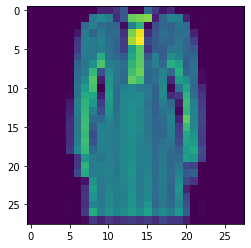

Label: Dress


In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions
new_test_image = test_image[np.newaxis, ..., np.newaxis]
print("new_test_image.shape", new_test_image.shape)

model_pred = conv_model.predict(
    x=new_test_image
)

print("Model prediction: ", labels[np.argmax(model_pred[0])])

new_test_image.shape (1, 28, 28, 1)
Model prediction:  Coat


In [ ]:
conv_model(new_test_image)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.2905137e-02, 7.1122532e-04, 8.1539117e-03, 1.3521095e-01,
        6.1038798e-01, 2.7072433e-08, 2.3234203e-01, 1.3295093e-05,
        2.7410986e-04, 1.3221926e-06]], dtype=float32)>